# HOA SEN GROUP 


In [18]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [19]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HSG Historical Data.csv')
df1=df.reset_index()['Price']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1313 non-null   object 
 1   Price     1313 non-null   float64
 2   Open      1313 non-null   object 
 3   High      1313 non-null   object 
 4   Low       1313 non-null   object 
 5   Vol.      1313 non-null   object 
 6   Change %  1313 non-null   object 
dtypes: float64(1), object(6)
memory usage: 71.9+ KB


In [21]:
df1.head()

0    21800.0
1    21550.0
2    21850.0
3    22050.0
4    22000.0
Name: Price, dtype: float64

In [22]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [24]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
train_last_windowsize = train_data[-time_step-1:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data_extended, time_step)

In [26]:
## 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 334s 269ms/step - loss: 0.1787
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0057
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0026
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0018
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0016
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0015
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0015 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0013
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0013 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0012
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0011
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0012
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0013
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0011
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/

In [29]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [30]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate MAE for testing data
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

# Calculate RMSE for testing data
rmse_testing = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Testing RMSE: {rmse_testing}')

# Calculate MAPE for testing data
mape_testing = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f'Testing MAPE: {mape_testing}')

# Calculate MLSE for testing data
mlse_testing = np.mean((np.log1p(y_test) - np.log1p(y_pred))**2)
print(f'Testing MLSE: {mlse_testing}')

# Calculate R-squared (R²) for testing data
r2_testing = r2_score(y_test, y_pred)
print(f'Testing R²: {r2_testing}')

# Calculate Mean Squared Error (MSE) for testing data
mse_testing = mean_squared_error(y_test, y_pred)
print(f'Testing MSE: {mse_testing}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Testing MAE: 409.85886168504123
Testing RMSE: 455.9190155869948
Testing MAPE: 7.118018435170029
Testing MLSE: 0.005880817368992916
Testing R²: 0.9089017231845803
Testing MSE: 207862.14877381444


# Dự đoán

In [31]:
# 13. Dự báo 90 ngày tiếp theo dựa trên dữ liệu test
x_input = test_data[60:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = x_input.shape[1]
i = 0
while i < 90:

    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

[0.0850789]
335
1 day input [0.14785057 0.15676091 0.15775153 0.14586933 0.14982919 0.15379167
 0.14982919 0.13894022 0.14190946 0.13102049 0.12507939 0.1320085
 0.11814767 0.13299912 0.1379496  0.1379496  0.12408877 0.11062263
 0.11101992 0.10824671 0.11418781 0.11161325 0.11517843 0.11319719
 0.1100293  0.10805068 0.10626808 0.09775242 0.10290155 0.10626808
 0.10151625 0.0894354  0.09359391 0.09300058 0.08131703 0.07042806
 0.06884411 0.07122003 0.07498125 0.06666423 0.06369498 0.05973512
 0.05973512 0.06072574 0.05795253 0.04864489 0.03998024 0.03187232
 0.04054743 0.04205557 0.03677576 0.03602038 0.02810065 0.0207455
 0.01980193 0.01980193 0.02168907 0.01923735 0.01904655 0.01225859
 0.00584701 0.         0.00188714 0.00848691 0.00660239 0.01282316
 0.00980687 0.01640664 0.02394998 0.02621351 0.03036156 0.03092875
 0.02734527 0.02546074 0.02923241 0.03771671 0.0467682  0.04752358
 0.05751864 0.05940579 0.05940579 0.05733045 0.05733045 0.05751864
 0.06129031 0.06034674 0.06279846 0.

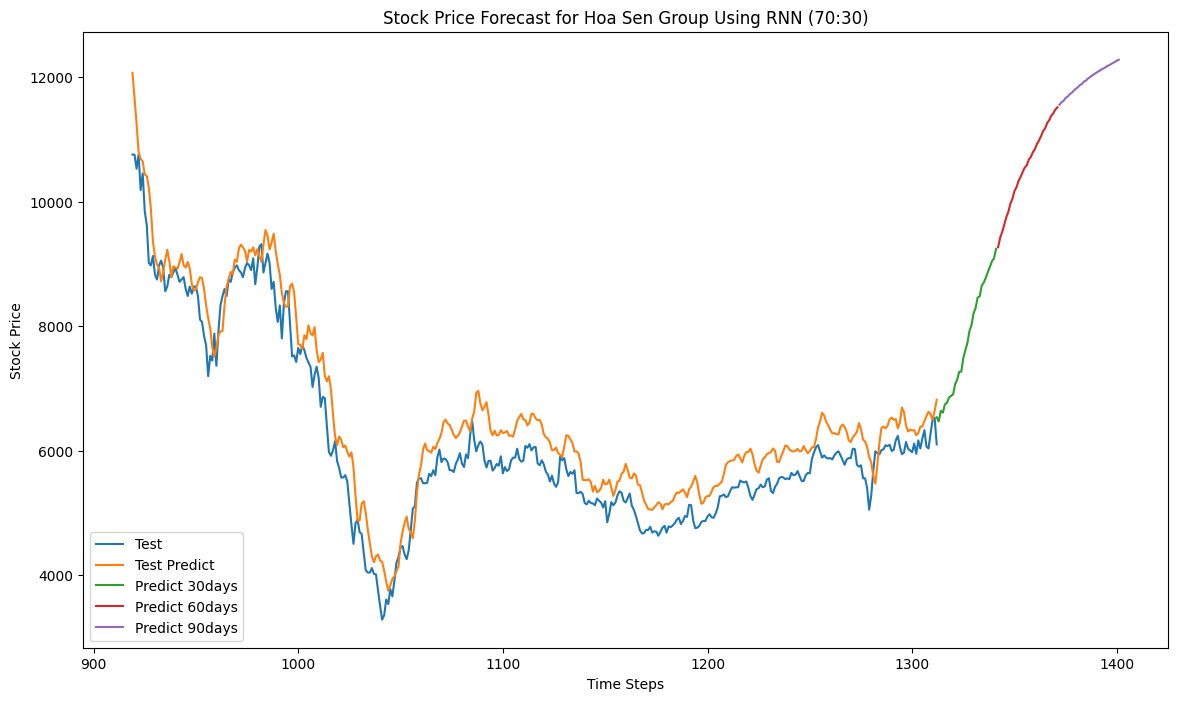

In [35]:
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_pred_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_pred_index, y_pred, label='Predict')

# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hoa Sen Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict', 'Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

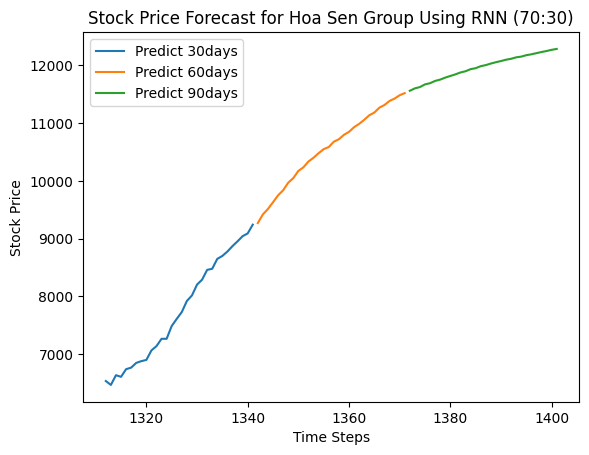

In [36]:


# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hoa Sen Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

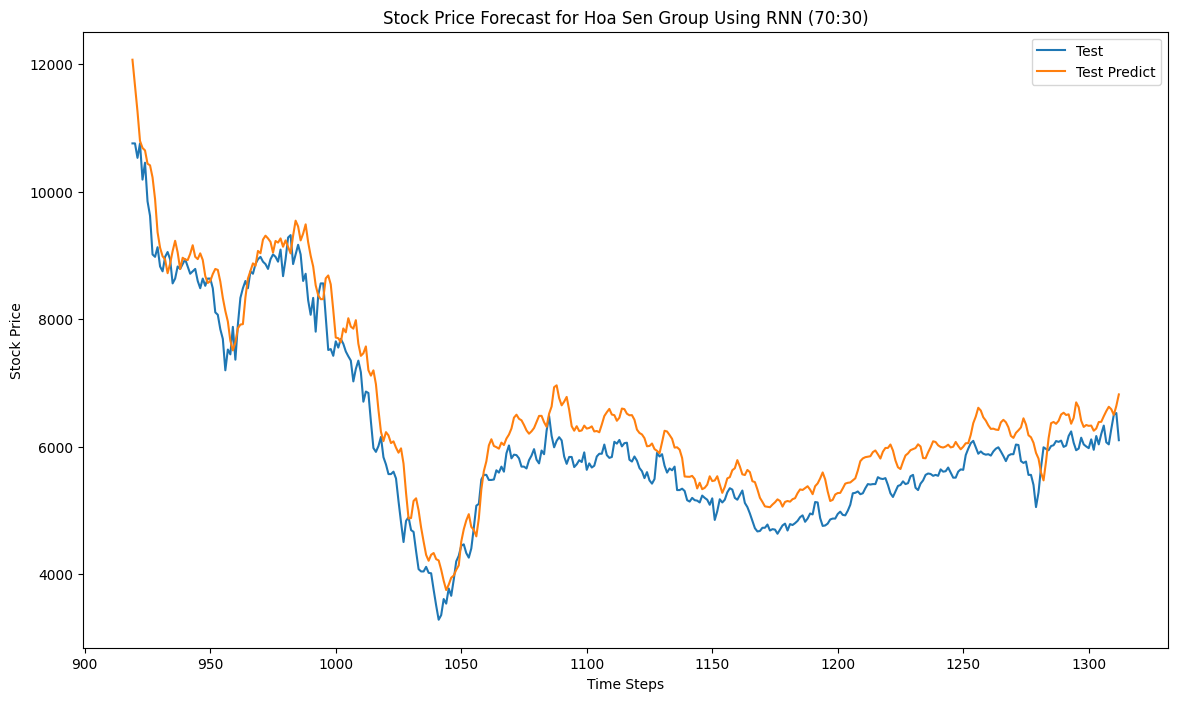

In [37]:
plt.figure(figsize=(14, 8))
# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_pred_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_pred_index, y_pred, label='Predict')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hoa Sen Group Using RNN (70:30)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict'])
plt.show()